# IDS2022-2023 Project

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Google-Playstore.csv")
data.drop(columns=["App Name"])
data.shape

(2312944, 24)

In [3]:
#data_orig = data.copy(deep=True)

In [4]:
data_clean = data.drop(columns=["App Id", "App Name", "Developer Website", "Developer Email", "Scraped Time", "Developer Id"])
data_clean.head(20)

Category  Rating  Rating Count Installs  Minimum Installs  \
0           Adventure     0.0           0.0      10+              10.0   
1               Tools     4.4          64.0   5,000+            5000.0   
2        Productivity     0.0           0.0      50+              50.0   
3       Communication     5.0           5.0      10+              10.0   
4               Tools     0.0           0.0     100+             100.0   
5              Social     0.0           0.0      50+              50.0   
6    Libraries & Demo     4.5          12.0   1,000+            1000.0   
7           Lifestyle     2.0          39.0     500+             500.0   
8       Communication     0.0           0.0      10+              10.0   
9     Personalization     4.7         820.0  50,000+           50000.0   
10             Racing     4.9          55.0     100+             100.0   
11  Maps & Navigation     0.0           0.0     100+             100.0   
12     Travel & Local     3.9         118.0  10,000+           10000.0   
13  Maps & Navigation     0.0           0.0     100+             100.0   
14     Travel & Local     3.7        1572.0  10,000+           10000.0   
15       Food & Drink     4.2          16.0   1,000+            1000.0   
16     Travel & Local     3.4           5.0     500+             500.0   
17              Tools     5.0           6.0      50+              50.0   
18          Lifestyle     3.7         328.0  10,000+           10000.0   
19  Books & Reference     0.0           0.0       1+               1.0   

    Maximum Installs  Free  Price Currency  Size Minimum Android  \
0                 15  True    0.0      USD   10M      7.1 and up   
1               7662  True    0.0      USD  2.9M      5.0 and up   
2                 58  True    0.0      USD  3.7M    4.0.3 and up   
3                 19  True    0.0      USD  1.8M    4.0.3 and up   
4                478  True    0.0      USD  6.2M      4.1 and up   
5                 89  True    0.0      USD   46M      6.0 and up   
6               2567  True    0.0      USD  2.5M      4.1 and up   
7                702  True    0.0      USD   16M      5.0 and up   
8                 18  True    0.0      USD  1.3M      4.4 and up   
9              62433  True    0.0      USD  3.5M      4.1 and up   
10               329  True    0.0      USD   51M      4.4 and up   
11               330  True    0.0      USD  2.7M      4.0 and up   
12             37763  True    0.0      USD  7.6M      4.2 and up   
13               274  True    0.0      USD   15M      6.0 and up   
14             42856  True    0.0      USD   29M      4.2 and up   
15              4313  True    0.0      USD   12M      4.4 and up   
16               949  True    0.0      USD  2.9M      4.4 and up   
17                62  True    0.0      USD  2.0M      4.1 and up   
18             31235  True    0.0      USD   70M      4.1 and up   
19                 2  True    0.0      XXX   11M      4.2 and up   

        Released  Last Updated Content Rating  \
0   Feb 26, 2020  Feb 26, 2020       Everyone   
1   May 21, 2020  May 06, 2021       Everyone   
2    Aug 9, 2019  Aug 19, 2019       Everyone   
3   Sep 10, 2018  Oct 13, 2018       Everyone   
4   Feb 21, 2020  Nov 12, 2018       Everyone   
5   Dec 24, 2018  Dec 20, 2019           Teen   
6   Sep 23, 2019  Sep 27, 2019       Everyone   
7   Jun 21, 2019  Jun 21, 2019       Everyone   
8            NaN  Dec 07, 2018           Teen   
9   Sep 22, 2019  Oct 07, 2020       Everyone   
10  Jul 30, 2020  Jul 30, 2020       Everyone   
11  Jan 10, 2018  Jun 27, 2018       Everyone   
12   Apr 3, 2018  Jun 11, 2021       Everyone   
13   Feb 9, 2020  May 14, 2021       Everyone   
14   Sep 5, 2018  May 30, 2020       Everyone   
15   Apr 5, 2020  Mar 23, 2021       Everyone   
16  Nov 28, 2016  Oct 30, 2019       Everyone   
17  Apr 24, 2019  May 05, 2019       Everyone   
18   Jul 1, 2020  May 26, 2021       Everyone   
19  Dec 26, 2020  Mar 23, 2021     Mature 17+   


<AxesSubplot:>

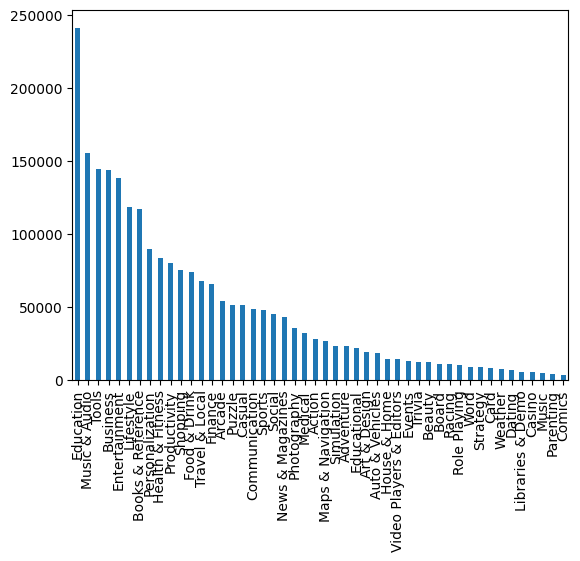

In [5]:
data_clean.Category.value_counts().plot(kind="bar")

<AxesSubplot:>

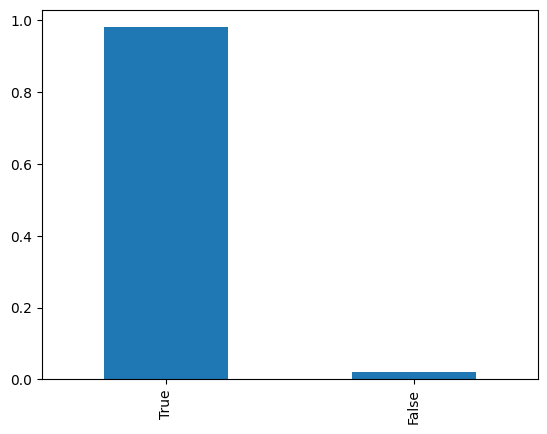

In [6]:
data_clean.Free.value_counts(normalize=True).plot(kind="bar")

In [7]:
'''
Price (initially given in US dollars) categories:

0 : 0
(0-5) : 1
[5-10) : 2
[10-max_value] : 3
'''


def categorize(p):
    if (p == 0):
        return 0
    if (p < 5):
        return 1 
    elif (p < 10):
        return 2
    else:
        return 3
data_clean.Price = data_clean.Price.map(categorize)
data_clean.Price.value_counts()

0    2268011
1      36620
2       5349
3       2964
Name: Price, dtype: int64

In [8]:
def cat_rating(r):
    if (r<1):
        return 0
    elif (r<2):
        return 1
    elif (r<3):
        return 2
    elif (r<4):
        return 3
    elif (r<5):
        return 4
print(data_clean.Rating.value_counts())
data_clean.Rating = data_clean.Rating.map(cat_rating)
data_clean.Rating.value_counts()


0.0    1059762
5.0     100122
4.2      87993
4.4      86304
4.3      83276
4.6      78302
4.5      76753
4.1      69723
4.0      67342
4.7      62205
4.8      61109
3.9      55684
3.8      53863
4.9      44524
3.7      43300
3.6      35989
3.5      31636
3.4      28908
3.3      22613
3.2      21485
3.0      17275
3.1      15539
2.8      12235
2.9      11522
2.6       9213
2.7       9200
2.5       6942
2.4       6051
2.3       5414
2.2       4954
2.0       3804
2.1       3675
1.8       2957
1.9       2588
1.7       1928
1.6       1644
1.5       1157
1.4       1011
1.0        713
1.3        579
1.2        531
1.1        236
Name: Rating, dtype: int64


0.0    1059762
4.0     717531
3.0     326292
2.0      73010
1.0      13344
Name: Rating, dtype: int64

In [9]:
#make "released" to categories and "last updated" to categories

# 0 == date does not exist

def clean_dates(d):
    if type(d)==type(3.5):
        return 0
    else:
        return d.split(",")[1]
    
data_clean.Released = data_clean.Released.map(clean_dates)

data_clean.head()

Category  Rating  Rating Count Installs  Minimum Installs  \
0      Adventure     0.0           0.0      10+              10.0   
1          Tools     4.0          64.0   5,000+            5000.0   
2   Productivity     0.0           0.0      50+              50.0   
3  Communication     NaN           5.0      10+              10.0   
4          Tools     0.0           0.0     100+             100.0   

   Maximum Installs  Free  Price Currency  Size Minimum Android Released  \
0                15  True      0      USD   10M      7.1 and up     2020   
1              7662  True      0      USD  2.9M      5.0 and up     2020   
2                58  True      0      USD  3.7M    4.0.3 and up     2019   
3                19  True      0      USD  1.8M    4.0.3 and up     2018   
4               478  True      0      USD  6.2M      4.1 and up     2020   

   Last Updated Content Rating  \
0  Feb 26, 2020       Everyone   
1  May 06, 2021       Everyone   
2  Aug 19, 2019       Everyone   
3  Oct 13, 2018       Everyone   
4  Nov 12, 2018       Everyone   

                                      Privacy Policy  Ad Supported  \
0                 https://beniyizibyose.tk/projects/         False   
1  https://dev4phones.wordpress.com/licencia-de-uso/          True   
2  https://www.vietnamairlines.com/vn/en/terms-an...         False   
3                                                NaN          True   
4                        http://www.horodyski.com.pl         False   

   In App Purchases  Editors Choice  
0             False           False  
1             False           False  
2             False           False  
3             False           False  
4             False           False

In [10]:
data_clean['Last Updated'] = data_clean["Last Updated"].map(clean_dates)

data_clean.head()

Category  Rating  Rating Count Installs  Minimum Installs  \
0      Adventure     0.0           0.0      10+              10.0   
1          Tools     4.0          64.0   5,000+            5000.0   
2   Productivity     0.0           0.0      50+              50.0   
3  Communication     NaN           5.0      10+              10.0   
4          Tools     0.0           0.0     100+             100.0   

   Maximum Installs  Free  Price Currency  Size Minimum Android Released  \
0                15  True      0      USD   10M      7.1 and up     2020   
1              7662  True      0      USD  2.9M      5.0 and up     2020   
2                58  True      0      USD  3.7M    4.0.3 and up     2019   
3                19  True      0      USD  1.8M    4.0.3 and up     2018   
4               478  True      0      USD  6.2M      4.1 and up     2020   

  Last Updated Content Rating  \
0         2020       Everyone   
1         2021       Everyone   
2         2019       Everyone   
3         2018       Everyone   
4         2018       Everyone   

                                      Privacy Policy  Ad Supported  \
0                 https://beniyizibyose.tk/projects/         False   
1  https://dev4phones.wordpress.com/licencia-de-uso/          True   
2  https://www.vietnamairlines.com/vn/en/terms-an...         False   
3                                                NaN          True   
4                        http://www.horodyski.com.pl         False   

   In App Purchases  Editors Choice  
0             False           False  
1             False           False  
2             False           False  
3             False           False  
4             False           False

In [11]:
def clean_pp(pp):
    if type(pp)==type(3.5):
        return 0
    else:
        return 1

data_clean['Privacy Policy'] = data_clean["Privacy Policy"].map(clean_pp)

data_clean.head()

Category  Rating  Rating Count Installs  Minimum Installs  \
0      Adventure     0.0           0.0      10+              10.0   
1          Tools     4.0          64.0   5,000+            5000.0   
2   Productivity     0.0           0.0      50+              50.0   
3  Communication     NaN           5.0      10+              10.0   
4          Tools     0.0           0.0     100+             100.0   

   Maximum Installs  Free  Price Currency  Size Minimum Android Released  \
0                15  True      0      USD   10M      7.1 and up     2020   
1              7662  True      0      USD  2.9M      5.0 and up     2020   
2                58  True      0      USD  3.7M    4.0.3 and up     2019   
3                19  True      0      USD  1.8M    4.0.3 and up     2018   
4               478  True      0      USD  6.2M      4.1 and up     2020   

  Last Updated Content Rating  Privacy Policy  Ad Supported  In App Purchases  \
0         2020       Everyone               1         False             False   
1         2021       Everyone               1          True             False   
2         2019       Everyone               1         False             False   
3         2018       Everyone               0          True             False   
4         2018       Everyone               1         False             False   

   Editors Choice  
0           False  
1           False  
2           False  
3           False  
4           False

In [12]:
#drop rows with nan values in installs column

data_clean = data_clean[data_clean['Installs'].notna()]

In [13]:
print(data_clean.Installs.unique())
print(data_clean["Minimum Installs"].unique())

'''
Install categories:
[0-100) : 0
[100-1000) : 1
[1000-10_000) : 2
[10_000-50_000) : 3
[50_000-100_000) : 4
[100_000-500_000) : 5
[500_000-1_000_000) : 6
[1_000_000-5_000_000) : 7
[5_000_000-10_000_000) : 8
[10_000_000-50_000_000) : 9
[50_000_000-100_000_000) : 10
[100_000_000 - max value) : 11
'''

['10+' '5,000+' '50+' '100+' '1,000+' '500+' '50,000+' '10,000+' '1+'
 '500,000+' '100,000+' '5+' '10,000,000+' '1,000,000+' '5,000,000+' '0+'
 '100,000,000+' '50,000,000+' '1,000,000,000+' '500,000,000+'
 '5,000,000,000+' '10,000,000,000+']
[1.e+01 5.e+03 5.e+01 1.e+02 1.e+03 5.e+02 5.e+04 1.e+04 1.e+00 5.e+05
 1.e+05 5.e+00 1.e+07 1.e+06 5.e+06 0.e+00 1.e+08 5.e+07 1.e+09 5.e+08
 5.e+09 1.e+10]


'\nInstall categories:\n[0-100) : 0\n[100-1000) : 1\n[1000-10_000) : 2\n[10_000-50_000) : 3\n[50_000-100_000) : 4\n[100_000-500_000) : 5\n[500_000-1_000_000) : 6\n[1_000_000-5_000_000) : 7\n[5_000_000-10_000_000) : 8\n[10_000_000-50_000_000) : 9\n[50_000_000-100_000_000) : 10\n[100_000_000 - max value) : 11\n'

In [14]:
def clean_installs(inst):
    var = inst[:-1]
    var = int(var.replace(",",""))
    
    if var < 100:
        return 0
    elif var < 1000:
        return 1
    elif var < 10_000:
        return 2
    elif var < 50_000:
        return 3
    elif var < 100_000:
        return 4
    elif var < 500_000:
        return 5
    elif var < 1_000_000:
        return 6
    elif var < 5_000_000:
        return 7
    elif var < 10_000_000:
        return 8
    elif var < 50_000_000:
        return 9
    elif var < 100_000_000:
        return 10
    else:
        return 11

#can adjust these categories if necessary

In [15]:
data_clean['Installs'] = data_clean["Installs"].map(clean_installs)

data_clean.head()

Category  Rating  Rating Count  Installs  Minimum Installs  \
0      Adventure     0.0           0.0         0              10.0   
1          Tools     4.0          64.0         2            5000.0   
2   Productivity     0.0           0.0         0              50.0   
3  Communication     NaN           5.0         0              10.0   
4          Tools     0.0           0.0         1             100.0   

   Maximum Installs  Free  Price Currency  Size Minimum Android Released  \
0                15  True      0      USD   10M      7.1 and up     2020   
1              7662  True      0      USD  2.9M      5.0 and up     2020   
2                58  True      0      USD  3.7M    4.0.3 and up     2019   
3                19  True      0      USD  1.8M    4.0.3 and up     2018   
4               478  True      0      USD  6.2M      4.1 and up     2020   

  Last Updated Content Rating  Privacy Policy  Ad Supported  In App Purchases  \
0         2020       Everyone               1         False             False   
1         2021       Everyone               1          True             False   
2         2019       Everyone               1         False             False   
3         2018       Everyone               0          True             False   
4         2018       Everyone               1         False             False   

   Editors Choice  
0           False  
1           False  
2           False  
3           False  
4           False

In [16]:
data_clean.Installs.unique()

array([ 0,  2,  1,  4,  3,  6,  5,  9,  7,  8, 11, 10], dtype=int64)

In [17]:
print(len(data_clean))
data_clean = data_clean.dropna() #dropping all of the rows where at least in one column is nan value
print(len(data_clean))

2312837
2183651


In [18]:
#dropping columns: minimum/maximum installs, free, currency
data_clean = data_clean.drop(columns=["Minimum Installs","Maximum Installs","Free","Currency"])
data_clean.head()

Category  Rating  Rating Count  Installs  Price  Size Minimum Android  \
0     Adventure     0.0           0.0         0      0   10M      7.1 and up   
1         Tools     4.0          64.0         2      0  2.9M      5.0 and up   
2  Productivity     0.0           0.0         0      0  3.7M    4.0.3 and up   
4         Tools     0.0           0.0         1      0  6.2M      4.1 and up   
5        Social     0.0           0.0         0      0   46M      6.0 and up   

  Released Last Updated Content Rating  Privacy Policy  Ad Supported  \
0     2020         2020       Everyone               1         False   
1     2020         2021       Everyone               1          True   
2     2019         2019       Everyone               1         False   
4     2020         2018       Everyone               1         False   
5     2018         2019           Teen               1         False   

   In App Purchases  Editors Choice  
0             False           False  
1             False           False  
2             False           False  
4             False           False  
5              True           False

In [19]:
data_clean = pd.get_dummies(data_clean, columns = ["Category", "Rating", "Price",
                                                    "Minimum Android","Released","Last Updated","Content Rating",
                                                    "Privacy Policy","Ad Supported","In App Purchases","Editors Choice"])
data_clean.head()

Rating Count  Installs  Size  Category_Action  Category_Adventure  \
0           0.0         0   10M                0                   1   
1          64.0         2  2.9M                0                   0   
2           0.0         0  3.7M                0                   0   
4           0.0         1  6.2M                0                   0   
5           0.0         0   46M                0                   0   

   Category_Arcade  Category_Art & Design  Category_Auto & Vehicles  \
0                0                      0                         0   
1                0                      0                         0   
2                0                      0                         0   
4                0                      0                         0   
5                0                      0                         0   

   Category_Beauty  Category_Board  ...  Content Rating_Teen  \
0                0               0  ...                    0   
1                0               0  ...                    0   
2                0               0  ...                    0   
4                0               0  ...                    0   
5                0               0  ...                    1   

   Content Rating_Unrated  Privacy Policy_0  Privacy Policy_1  \
0                       0                 0                 1   
1                       0                 0                 1   
2                       0                 0                 1   
4                       0                 0                 1   
5                       0                 0                 1   

   Ad Supported_False  Ad Supported_True  In App Purchases_False  \
0                   1                  0                       1   
1                   0                  1                       1   
2                   1                  0                       1   
4                   1                  0                       1   
5                   1                  0                       0   

   In App Purchases_True  Editors Choice_False  Editors Choice_True  
0                      0                     1                    0  
1                      0                     1                    0  
2                      0                     1                    0  
4                      0                     1                    0  
5                      1                     1                    0  

[5 rows x 254 columns]

In [20]:
'''
Rating count categories will be the same as install categories

def clean_rating_counts(rc):
    var = int(rc)
    
    if var < 100:
        return 0
    elif var < 1000:
        return 1
    elif var < 10_000:
        return 2
    elif var < 50_000:
        return 3
    elif var < 100_000:
        return 4
    elif var < 500_000:
        return 5
    elif var < 1_000_000:
        return 6
    elif var < 5_000_000:
        return 7
    elif var < 10_000_000:
        return 8
    elif var < 50_000_000:
        return 9
    elif var < 100_000_000:
        return 10
    else:
        return 11

data_clean["Rating Count"] = data_clean["Rating Count"].map(clean_rating_counts)

data_clean.head()
'''

'\nRating count categories will be the same as install categories\n\ndef clean_rating_counts(rc):\n    var = int(rc)\n    \n    if var < 100:\n        return 0\n    elif var < 1000:\n        return 1\n    elif var < 10_000:\n        return 2\n    elif var < 50_000:\n        return 3\n    elif var < 100_000:\n        return 4\n    elif var < 500_000:\n        return 5\n    elif var < 1_000_000:\n        return 6\n    elif var < 5_000_000:\n        return 7\n    elif var < 10_000_000:\n        return 8\n    elif var < 50_000_000:\n        return 9\n    elif var < 100_000_000:\n        return 10\n    else:\n        return 11\n\ndata_clean["Rating Count"] = data_clean["Rating Count"].map(clean_rating_counts)\n\ndata_clean.head()\n'

In [21]:
#data_clean["Rating Count"].value_counts()

In [22]:
#data_clean["Size"].value_counts() #the rows where the value is "varies with device" will be quite useless

In [23]:
data_clean = data_clean[data_clean.Size != "Varies with device"]
print(len(data_clean))

2132460


In [24]:
def clean_sizes(sz):
    sz = sz.replace(",","")
    last = sz[-1]
    sz = float(sz[:-1])
    if last == "G":
        return sz*1_000_000_000
    elif last == "M":
        return sz*1_000_000
    elif last == "k":
        return sz*1000
    else: #weird values
        print(sz, last)
        return 0
    
data_clean["Size"] = data_clean["Size"].map(clean_sizes)

data_clean.head()

Rating Count  Installs        Size  Category_Action  Category_Adventure  \
0           0.0         0  10000000.0                0                   1   
1          64.0         2   2900000.0                0                   0   
2           0.0         0   3700000.0                0                   0   
4           0.0         1   6200000.0                0                   0   
5           0.0         0  46000000.0                0                   0   

   Category_Arcade  Category_Art & Design  Category_Auto & Vehicles  \
0                0                      0                         0   
1                0                      0                         0   
2                0                      0                         0   
4                0                      0                         0   
5                0                      0                         0   

   Category_Beauty  Category_Board  ...  Content Rating_Teen  \
0                0               0  ...                    0   
1                0               0  ...                    0   
2                0               0  ...                    0   
4                0               0  ...                    0   
5                0               0  ...                    1   

   Content Rating_Unrated  Privacy Policy_0  Privacy Policy_1  \
0                       0                 0                 1   
1                       0                 0                 1   
2                       0                 0                 1   
4                       0                 0                 1   
5                       0                 0                 1   

   Ad Supported_False  Ad Supported_True  In App Purchases_False  \
0                   1                  0                       1   
1                   0                  1                       1   
2                   1                  0                       1   
4                   1                  0                       1   
5                   1                  0                       0   

   In App Purchases_True  Editors Choice_False  Editors Choice_True  
0                      0                     1                    0  
1                      0                     1                    0  
2                      0                     1                    0  
4                      0                     1                    0  
5                      1                     1                    0  

[5 rows x 254 columns]

In [25]:
'''
Size categories:
<1kB : 0
1kB<=x<10kB : 1
10kB<=x<50kB : 2
50kB<=x<100kB : 3
100kB<=x<500kB : 4
500kB<=x<1MB : 5
1MB<=x<10MB : 6
10MB<=x<100MB : 7
100MB<=x<1GB : 8
1GB<x : 9


def clean_sizes2(sz):
    if sz<1000:
        return 0
    elif sz<10_000:
        return 1
    elif sz<50_000:
        return 2
    elif sz<100_000:
        return 3
    elif sz<500_000:
        return 4
    elif sz<1_000_000:
        return 5
    elif sz<10_000_000:
        return 6
    elif sz<100_000_000:
        return 7
    elif sz<1_000_000_000:
        return 8
    else:
        return 9
    
data_clean["Size"] = data_clean["Size"].map(clean_sizes2)

data_clean.head()
'''

'\nSize categories:\n<1kB : 0\n1kB<=x<10kB : 1\n10kB<=x<50kB : 2\n50kB<=x<100kB : 3\n100kB<=x<500kB : 4\n500kB<=x<1MB : 5\n1MB<=x<10MB : 6\n10MB<=x<100MB : 7\n100MB<=x<1GB : 8\n1GB<x : 9\n\n\ndef clean_sizes2(sz):\n    if sz<1000:\n        return 0\n    elif sz<10_000:\n        return 1\n    elif sz<50_000:\n        return 2\n    elif sz<100_000:\n        return 3\n    elif sz<500_000:\n        return 4\n    elif sz<1_000_000:\n        return 5\n    elif sz<10_000_000:\n        return 6\n    elif sz<100_000_000:\n        return 7\n    elif sz<1_000_000_000:\n        return 8\n    else:\n        return 9\n    \ndata_clean["Size"] = data_clean["Size"].map(clean_sizes2)\n\ndata_clean.head()\n'

In [26]:
#data_clean = pd.get_dummies(data_clean, columns = ["Rating Count","Size"])
data_clean.head()

Rating Count  Installs        Size  Category_Action  Category_Adventure  \
0           0.0         0  10000000.0                0                   1   
1          64.0         2   2900000.0                0                   0   
2           0.0         0   3700000.0                0                   0   
4           0.0         1   6200000.0                0                   0   
5           0.0         0  46000000.0                0                   0   

   Category_Arcade  Category_Art & Design  Category_Auto & Vehicles  \
0                0                      0                         0   
1                0                      0                         0   
2                0                      0                         0   
4                0                      0                         0   
5                0                      0                         0   

   Category_Beauty  Category_Board  ...  Content Rating_Teen  \
0                0               0  ...                    0   
1                0               0  ...                    0   
2                0               0  ...                    0   
4                0               0  ...                    0   
5                0               0  ...                    1   

   Content Rating_Unrated  Privacy Policy_0  Privacy Policy_1  \
0                       0                 0                 1   
1                       0                 0                 1   
2                       0                 0                 1   
4                       0                 0                 1   
5                       0                 0                 1   

   Ad Supported_False  Ad Supported_True  In App Purchases_False  \
0                   1                  0                       1   
1                   0                  1                       1   
2                   1                  0                       1   
4                   1                  0                       1   
5                   1                  0                       0   

   In App Purchases_True  Editors Choice_False  Editors Choice_True  
0                      0                     1                    0  
1                      0                     1                    0  
2                      0                     1                    0  
4                      0                     1                    0  
5                      1                     1                    0  

[5 rows x 254 columns]

In [27]:
X = data_clean.drop('Installs',axis=1)
y = data_clean['Installs']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
parameters = {
    'max_depth': [None],
    'min_samples_leaf': [1],
    'n_estimators': [100],
    #'criterion': ["gini", "entropy", "log_loss"]
}

In [29]:
from sklearn.model_selection import GridSearchCV #for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           cv=2,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

'''
    'max_depth': [10,20,30,None],
    'min_samples_leaf': [1,10,50,100,500,1000],
    'n_estimators': [10,25,50,100,200],
    'criterion': ["gini", "entropy", "log_loss"]
'''

print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
0.5746596264798165
RandomForestClassifier(n_jobs=-1, random_state=1)
